# Sigmoid Lab

### Introduction

In this lesson, we'll practice using the sigmoid function.  As we know, our logistic regression function predicts the likelihood of an event by scaling outputs from our decision function to a number between zero and one, and uses the sigmoid function to do so.  In this lesson, we'll begin by exploring the sigmoid function, and then apply it to our heart disease data.

### Exploring the Sigmoid

Let's begin by writing out the formula for the sigmoid function.

In [1]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Notice that as x becomes large, this makes the $e^{-x}$ become small.

In [8]:
x = 5
np.exp(-x)

0.006737946999085467

And this makes the denominator close to the numerator (one), and thus the sigmoid output a number close to one.

In [9]:
sigmoid(5)

0.9933071490757153

When x is negative by contrast, then the denominator becomes large:

In [10]:
x = -5 
np.exp(-x)

148.4131591025766

And the output of the sigmoid function becomes small.

In [11]:
sigmoid(-5)

0.0066928509242848554

Pass through the correct argument so that `sigmoid` outputs .5 below.

In [12]:
sigmoid(0)

0.5

Next let's plot the outputs of the sigmoid function function for 10 values of x between -5 and 5.

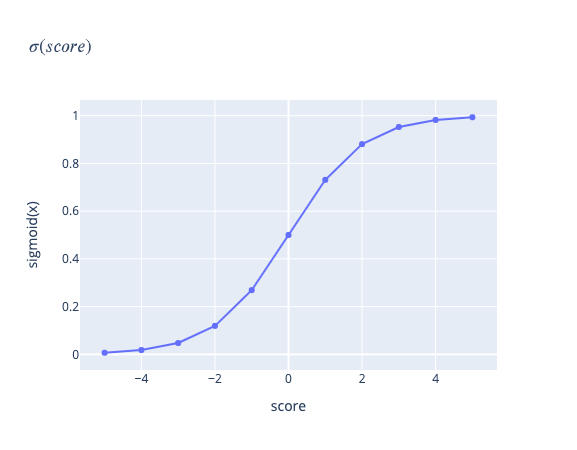

In [20]:
import plotly.graph_objects as go
x_vals = np.arange(-5, 6, 1)
y_vals = [sigmoid(val) for val in x_vals]

scatter = go.Scatter(x = x_vals, y = y_vals)
go.Figure(scatter, layout = {'title': '$\sigma(score)$', 
                             'xaxis': {'title': 'score'},
                             'yaxis': {'title': 'sigmoid(x)'}
                            })

### Finding the Probabilities

Let's move back to our heart disease dataset.  This time using our sigmoid function to calculate the probabilities of heart disease.

In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./heart.csv')
selected_cols = ['ca', 'oldpeak', 'target']
scoped_df = scoped_df[selected_cols]
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state =1, 
                                                    test_size = .2)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train).score(X_test, y_test)

0.7213114754098361

Now, use the `decision_function` to find the scores for each of the observations in the test set. 

In [31]:
prediction_scores = model.decision_function(X_test)
prediction_scores[:5]
# array([-5.55378129,  1.11474552, -2.39881685, -4.85796051, -3.42171411])

array([-5.55378129,  1.11474552, -2.39881685, -4.85796051, -3.42171411])

Then use the sigmoid function, written above to turn these scores into probabilities.

In [33]:
soft_labels = sigmoid(prediction_scores)
soft_labels[:5]

array([0.00385784, 0.75301276, 0.08326296, 0.00770646, 0.03162369])

Let's check that we get the same results from the `predict_proba` function of our logistic regression model.

In [42]:
model_predictions = model.predict_proba(X_test)

model_predictions[:4]

array([[0.99614216, 0.00385784],
       [0.24698724, 0.75301276],
       [0.91673704, 0.08326296],
       [0.99229354, 0.00770646]])

Notice that sklearn gives us to sets of predictions, one for each label.  We only need the predictions corresponding to the prediction of 1.

In [43]:
model_predictions[:4, 1]

array([0.00385784, 0.75301276, 0.08326296, 0.00770646])

Finally, write a function that turns a soft label into hard labels.

In [36]:
def hard_label(soft):
    if soft > .5:
        return 1
    else:
        return 0

In [37]:
predictions = [hard_label(label) for label in soft_labels ]
predictions[:3]

[0, 1, 0]

### Plotting our Scores

Finally, let's plot our observations for the test data along with our model's predictions.  We can see the soft labels as we hover over the observations.

In [49]:
X_test_pred = X_test.assign(target= y_test, soft_predictions = model_predictions[:, 1])
df_scoped_heart_d = X_test_pred[X_test_pred['target'] == 1]
df_scoped_benign = X_test_pred[X_test_pred['target'] == 0]

In [51]:
import plotly.graph_objects as go
scatter_benign = go.Scatter(x = df_scoped_benign['ca'], 
                     y = df_scoped_benign['oldpeak'],
                    mode = 'markers', name = 'benign', 
                            hovertext = df_scoped_benign['soft_predictions'])
scatter_heart_d = go.Scatter(x = df_scoped_heart_d['ca'], 
                     y = df_scoped_heart_d['oldpeak'], mode = 'markers',
                             name = 'heart disease', hovertext = df_scoped_heart_d['soft_predictions'])

fig = go.Figure(data = [scatter_benign, scatter_heart_d], 
          layout =  {'xaxis': {'title': 'resting cardiographic results'},
                     'yaxis': {'title': 'old peak'}
                    })

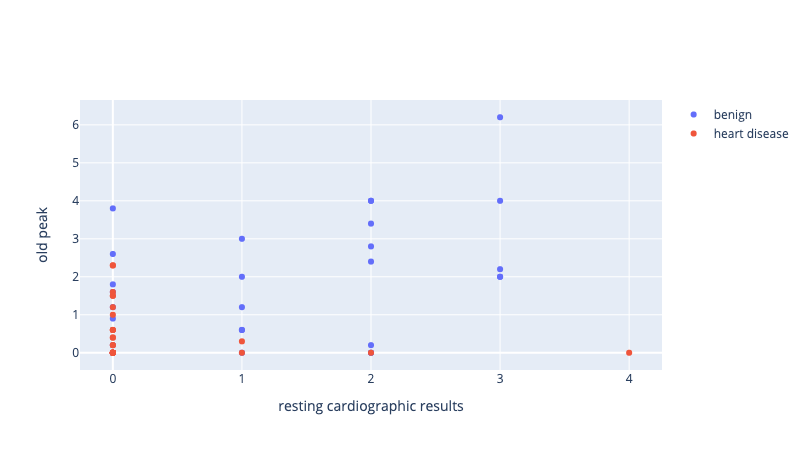

In [52]:
fig